In [1]:
import numpy as np
import os
import cv2

def salt_n_pepper_noise(image,amount=0.004,s_vs_p=0.5):
    
#     if 2 == len(image.shape):
#         row,col= image.shape
#         ch = 1
        
#     else:
#         row,col,ch = image.shape
        
    #s_vs_p = 0.5
    #amount = 0.004
    
    out = np.copy(image)
    
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    #coords = [np.random.randint(0, i - 1, int(num_salt))
    #          for i in image.shape]
    coords = [np.random.randint(0, i, int(num_salt))
              for i in image.shape]
    out[tuple(coords)] = 1
    
    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    #coords = [np.random.randint(0, i - 1, int(num_pepper))
    #          for i in image.shape]
    coords = [np.random.randint(0, i, int(num_salt))
              for i in image.shape]
    out[tuple(coords)] = 0
    
    return out

In [4]:
from skimage import data
#from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
import matplotlib.pyplot as plt

astro = data.astronaut()
astro = cv2.cvtColor(astro,cv2.COLOR_RGB2GRAY)

# Noramlize to the range of 0~1 
info = np.iinfo(astro.dtype)
astro = astro/info.max

plt.axis('off')
plt.imshow(astro ,cmap='gray')

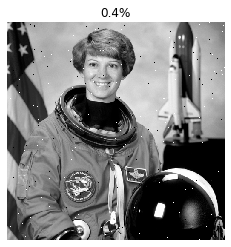

In [5]:
s_vs_p = 0.5
amount = 0.004

s_p_04 = salt_n_pepper_noise(astro,amount,s_vs_p)

plt.title('0.4%')
plt.axis('off')
plt.imshow(s_p_04 ,cmap='gray')

In [6]:
import math

def mae(src,dst):
    return np.mean(np.abs(src-dst))

def mse(src,dst):
    return np.mean((src-dst)**2)

def sse(src,dst):
    return np.sum((src-dst)**2)

def rmse(src,dst):
    return np.sqrt(mse(src,dst))

def psnr(src,dst):
    mse = np.mean((src-dst)**2)
    if mse == 0:
        return math.inf
    MAX=1
    return 20* math.log10(MAX/math.sqrt(mse))

In [7]:
print('mae = {:.4f}'.format(mae(astro,s_p_04)))
print('mse = {:.4f}'.format(mse(astro,s_p_04)))
print('sse = {:.4f}'.format(sse(astro,s_p_04)))
print('rmse= {:.4f}'.format(rmse(astro,s_p_04)))
print('psnr= {:.4f}'.format(psnr(astro,s_p_04)))

mae = 0.0020
mse = 0.0014
sse = 364.6476
rmse= 0.0373
psnr= 28.5667


psnr= 9.6013
psnr= 18.7779
psnr= 28.9486
psnr= inf


(<matplotlib.axes._subplots.AxesSubplot at 0x1f69e59ff28>,
 Text(0.5, 1.0, 'original'),
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x1f69e5f9668>)

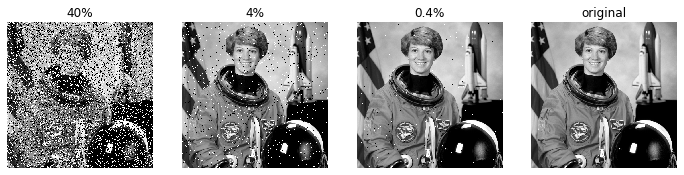

In [8]:

amount=0.004
s_p_04 = salt_n_pepper_noise(astro,amount,s_vs_p)

amount=0.04
s_p_4 = salt_n_pepper_noise(astro,amount,s_vs_p)

amount=0.4
s_p_40 = salt_n_pepper_noise(astro,amount,s_vs_p)


print('psnr= {:.4f}'.format(psnr(astro,s_p_40)))
print('psnr= {:.4f}'.format(psnr(astro,s_p_4)))
print('psnr= {:.4f}'.format(psnr(astro,s_p_04)))
print('psnr= {:.4f}'.format(psnr(astro,astro)))

plt.figure(figsize=(12,18))
plt.subplot(141), plt.title('40%'),plt.axis('off'),plt.imshow(s_p_40,cmap='gray')
plt.subplot(142), plt.title('4%'),plt.axis('off'),plt.imshow(s_p_4,cmap='gray')
plt.subplot(143), plt.title('0.4%'),plt.axis('off'),plt.imshow(s_p_04,cmap='gray')
plt.subplot(144), plt.title('original'),plt.axis('off'),plt.imshow(astro,cmap='gray')